In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from prophet import Prophet
import requests


In [11]:
# Read in csv 
data_x = pd.read_csv("files/congress-trading-all.csv")
x_df = pd.DataFrame(data_x)

display(x_df)


,Ticker,TickerType,Company,Traded,Transaction,Trade_Size_USD,Status,Subholding,Description,Name,BioGuideID,Filed,Party,District,Chamber,Comments,Quiver_Upload_Time,excess_return,State,last_modified
0,GLW,ST,CORNING INCORPORATED COMMON STOCK,2024-07-23,Purchase,"$1,001 - $15,000",NEW,NaN,NaN,Marjorie Taylor Mrs Greene,G000596,2024-07-24,R,GA14,House,NaN,2024-07-25,-1.054504,Georgia,2024-07-25
1,ABCB,ST,AMERIS BANCORP - COMMON STOCK,2024-07-23,Sale,"$100,001 - $250,000",NEW,STIFEL,NaN,Earl Leroy Carter,C001103,2024-07-24,R,GA01,House,NaN,2024-07-25,2.772833,Georgia,2024-07-25
2,UPS,ST,"UNITED PARCEL SERVICE, INC. COMMON STOCK",2024-07-23,Purchase,"$1,001 - $15,000",NEW,NaN,NaN,Marjorie Taylor Mrs Greene,G000596,2024-07-24,R,GA14,House,NaN,2024-07-25,2.592441,Georgia,2024-07-25
3,DUK,ST,DUKE ENERGY CORPORATION,2024-07-23,Purchase,"$1,001 - $15,000",NEW,NaN,NaN,Marjorie Taylor Mrs Greene,G000596,2024-07-24,R,GA14,House,NaN,2024-07-25,2.541266,Georgia,2024-07-25
4,JPM,ST,JP MORGAN CHASE & CO. COMMON STOCK,2024-07-23,Purchase,"$1,001 - $15,000",NEW,NaN,NaN,Marjorie Taylor Mrs Greene,G000596,2024-07-24,R,GA14,House,NaN,2024-07-25,2.599848,Georgia,2024-07-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47266,CAT,NaN,"CATERPILLAR, INC.",2012-07-26,Purchase,"$1,001 - $15,000",NEW,BROKERAGE #2 USAA 8425,NaN,Ms. Tammy Duckworth,D000622,2014-07-08,D,IL08,House,NaN,2020-07-26,19.001886,Illinois,2023-11-16
47267,PG,NaN,PROCTER & GAMBLE COMPANY,2012-07-24,Sale,"$1,001 - $15,000",NEW,BROKERAGE #2 USAA 8425,NaN,Ms. Tammy Duckworth,D000622,2014-07-08,D,IL08,House,NaN,2020-07-26,-143.881120,Illinois,2023-11-16
47268,KSU,NaN,KANSAS CITY SOUTHERN,2012-06-06,Purchase,"$1,001 - $15,000",NEW,NaN,NaN,Mr. Alan S. Lowenthal,L000579,2014-05-15,D,CA47,House,NaN,2020-07-26,89.238230,California,2023-11-16
47269,EP$C,NaN,EL PASO CORPORATION PREFERRED STOCK,2012-03-20,Sale,"$1,001 - $15,000",NEW,NaN,NaN,Mr. Alan S. Lowenthal,L000579,2014-05-15,D,CA47,House,NaN,2020-07-26,NaN,California,2023-11-16


In [43]:
  ## Democrats            ## Republicans
# Josh Gottheimer       # Thomas Macarthur
# Lois Frankel          # David Perdue
# Susie Lee             # Greg Gianforte

In [60]:
# Filter the DataFrame to find rows where the 'name' column matches the target name


,Ticker,TickerType,Company,Traded,Transaction,Trade_Size_USD,Status,Subholding,Description,Name,BioGuideID,Filed,Party,District,Chamber,Comments,Quiver_Upload_Time,excess_return,State,last_modified
24,MAR,ST,MARRIOTT INTERNATIONAL - CLASS A COMMON STOCK,2024-06-28,Sale,"$1,001 - $15,000",NEW,MORGAN STANLEY - SELECT UMA ACCOUNT # 1,NaN,Josh Gottheimer,G000583,2024-07-09,D,NJ05,House,NaN,2024-07-10,-2.178386,New Jersey,2024-07-10
25,AAPL,ST,APPLE INC. - COMMON STOCK,2024-06-28,Purchase,"$1,001 - $15,000",NEW,MORGAN STANLEY - SELECT UMA ACCOUNT # 1,NaN,Josh Gottheimer,G000583,2024-07-09,D,NJ05,House,NaN,2024-07-10,3.444960,New Jersey,2024-07-10
27,NVDA,ST,NVIDIA CORPORATION - COMMON STOCK,2024-06-28,Purchase,"$1,001 - $15,000",NEW,MORGAN STANLEY - SELECT UMA ACCOUNT # 1,NaN,Josh Gottheimer,G000583,2024-07-09,D,NJ05,House,NaN,2024-07-10,-8.523072,New Jersey,2024-07-10
28,MSFT,ST,MICROSOFT CORPORATION - COMMON STOCK,2024-06-28,Purchase,"$1,001 - $15,000",NEW,MORGAN STANLEY - SELECT UMA ACCOUNT # 1,NaN,Josh Gottheimer,G000583,2024-07-09,D,NJ05,House,NaN,2024-07-10,-4.890644,New Jersey,2024-07-10
30,LOW,ST,"LOWE'S COMPANIES, INC. COMMON STOCK",2024-06-28,Sale,"$1,001 - $15,000",NEW,MORGAN STANLEY - SELECT UMA ACCOUNT # 1,NaN,Josh Gottheimer,G000583,2024-07-09,D,NJ05,House,NaN,2024-07-10,8.310732,New Jersey,2024-07-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35656,TKGBY,ST,TURKIYE GARANTI BANKASI A S AMERICAN DEPOSITAR...,2017-01-04,Purchase,"$1,001 - $15,000",NEW,MORGAN STANLEY - SELECT UMA ACCOUNT # 3,NaN,Josh Gottheimer,G000583,2018-08-13,D,NJ05,House,NaN,2020-07-26,NaN,New Jersey,2023-11-16
35661,FANUY,ST,FANUC CORPORATION UNSPONSORED ADR,2017-01-04,Sale,"$1,001 - $15,000",NEW,MORGAN STANLEY - SELECT UMA ACCOUNT # 3,NaN,Josh Gottheimer,G000583,2018-08-13,D,NJ05,House,NaN,2020-07-26,NaN,New Jersey,2023-11-16
35670,HRB,ST,"H&R BLOCK, INC.",2017-01-03,Purchase,"$1,001 - $15,000",NEW,MORGAN STANLEY - SELECT UMA ACCOUNT # 2,NaN,Josh Gottheimer,G000583,2018-08-13,D,NJ05,House,NaN,2020-07-26,6.572118,New Jersey,2023-11-16
35671,BBVA,ST,BANCO BILBAO VIZCAYA ARGENTARIA S.A.,2017-01-03,Purchase,"$1,001 - $15,000",NEW,MORGAN STANLEY - SELECT UMA ACCOUNT # 3,NaN,Josh Gottheimer,G000583,2018-08-13,D,NJ05,House,NaN,2020-07-26,-80.078517,New Jersey,2023-11-16


In [61]:
# Number of top rows to retrieve
n = 5

# Filter the DataFrame to get the top `n` rows by 'excess_return'
Gottheim_df = x_df.nlargest(n, 'excess_return')
print(Gottheim_df)

      Ticker TickerType                               Company      Traded  \
31988   WSTL        NaN  WESTELL TECHNOLOGIES, INC. - CLASS A  2017-11-22   
31989   WSTL        NaN  WESTELL TECHNOLOGIES, INC. - CLASS A  2017-11-22   
39637   NVDA      Stock                    NVIDIA Corporation  2016-01-06   
39654   NVDA      Stock                    NVIDIA Corporation  2016-01-05   
38332   NVDA      Stock                    NVIDIA Corporation  2016-04-19   

      Transaction    Trade_Size_USD Status Subholding        Description  \
31988        Sale  $1,001 - $15,000    NEW        NaN  DEPENDENT CHILD C   
31989        Sale  $1,001 - $15,000    NEW        NaN  DEPENDENT CHILD A   
39637    Purchase  $1,001 - $15,000    New        NaN                NaN   
39654    Purchase  $1,001 - $15,000    New        NaN                NaN   
38332    Purchase  $1,001 - $15,000    New        NaN                NaN   

                           Name BioGuideID       Filed Party District Chamber  \

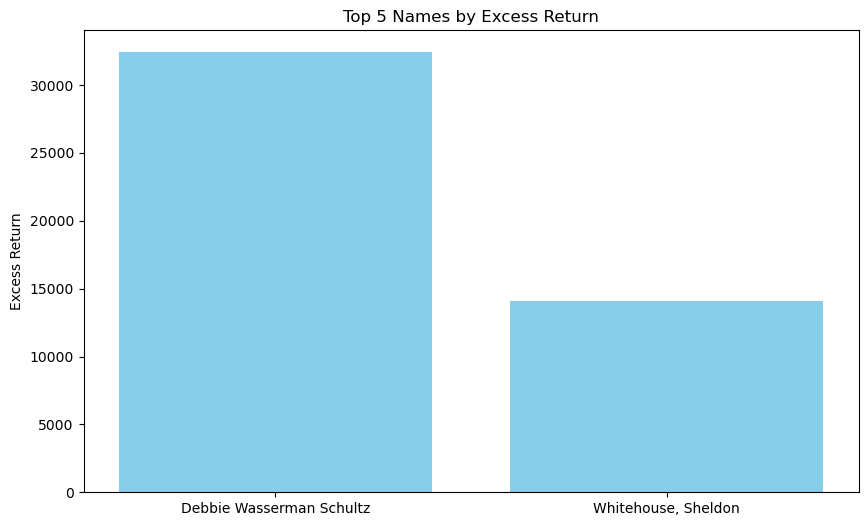

In [68]:
plt.figure(figsize=(10, 6))
plt.bar(x_df['Name'], Gottheim_df['excess_return'], color='skyblue')

# Add labels and title
# plt.xlabel('Name')
plt.ylabel('Excess Return')
plt.title(f'Top {n} Names by Excess Return')
plt.xticks(rotation=0)

# Display the plot
# plt.tight_layout()
plt.show()